# Imports

In [15]:
# Importing packages
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar

# Importing classes
from GraphHelper import create_edgeworth_plot
from ExchangeEconomy import ExchangeEconomyClass


# Plot settings
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Reload settings
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initializing the exchange economy object

In [16]:
model = ExchangeEconomyClass()

# Question 1

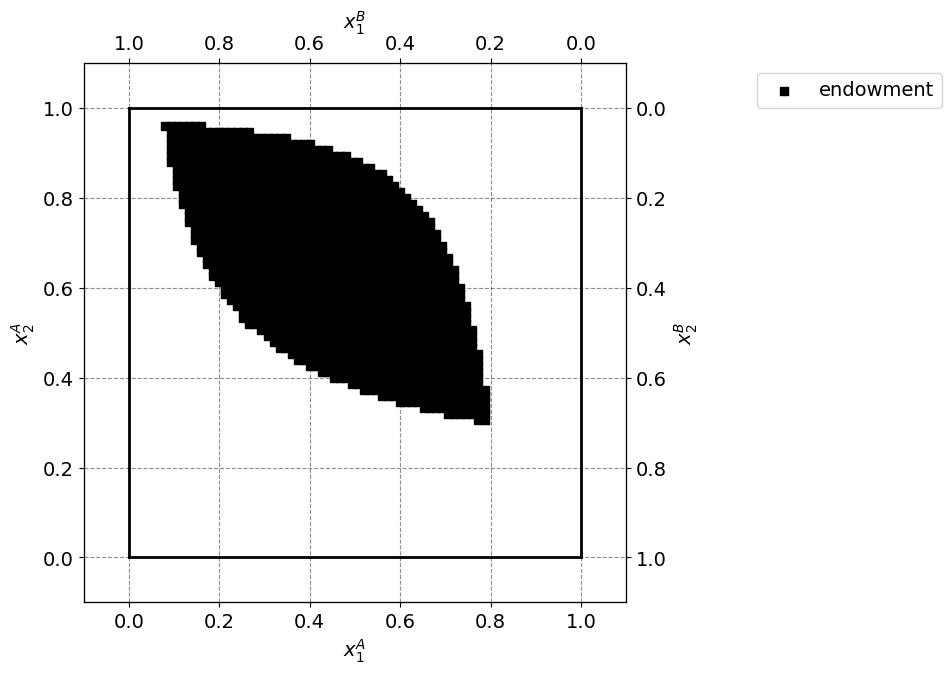

In [17]:
# 1. Defining x1A and x2A
x1A_list = [i * 1/75 for i in range(76)]
x2A_list = [i * 1/75 for i in range(76)]

# 2. Create a list of all combinations of x1A_list and x2A_list
xA_combinations = list(itertools.product(x1A_list, x2A_list))

# 3. Array for the combinations of x1A and x2A that are Pareto improvements
pareto_combinations = []

# 4. Looping through all combinations of x1A, x2A, x1B and x2B
for (x1A, x2A) in xA_combinations:
    x1B = 1 - x1A
    x2B = 1 - x2A

    if model.utility_A(x1A, x2A) >= model.utility_A(model.par.w1A, model.par.w2A) and model.utility_B(x1B, x2B) >= model.utility_B(model.par.w1B, model.par.w2B):
        pareto_combinations.append((x1A, x2A))

# 5. Seperating Pareto improvement combinations into two seperate arrays for them to be plotted
x1A_pareto = [x[0] for x in pareto_combinations]
x2A_pareto = [x[1] for x in pareto_combinations]

# 6. Edgeworth Plot

# 6.1. Initializing plot
edgeworth_plot_1 = create_edgeworth_plot()

# 6.2. Adding datapoints to the Edgeworth box
edgeworth_plot_1.scatter(x1A_pareto, x2A_pareto, marker='s', color='black', label='endowment')
edgeworth_plot_1.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

In [18]:
# 1. Defining p1
p1 = [(0.5 + 2*i/75) for i in range(76)]

# 2. Calculate the errors
errors = [model.check_market_clearing(x) for x in p1]
eps1 = [x[0] for x in errors]
eps2 = [x[1] for x in errors]

# 3. Create DataFrame with errors and print it
df = pd.DataFrame(errors, columns=['eps1', 'eps2'])
display(df)

,eps1,eps2
0,0.533333,-0.266667
1,0.475949,-0.250667
2,0.424096,-0.234667
3,0.377011,-0.218667
4,0.334066,-0.202667
...,...,...
71,-0.363231,0.869333
72,-0.365840,0.885333
73,-0.368392,0.901333
74,-0.370889,0.917333


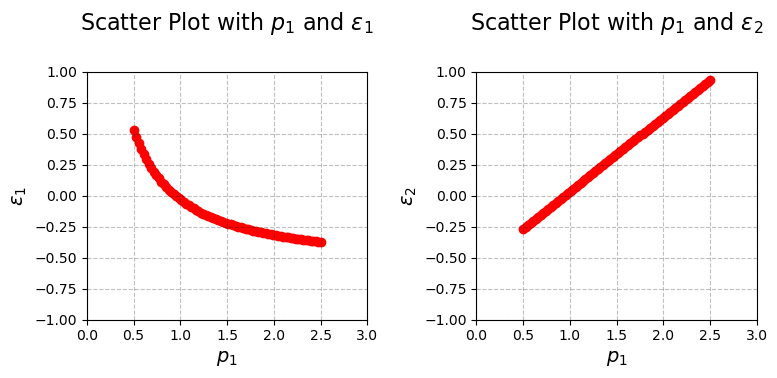

In [51]:

# 4. Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# 5. Customizing plot 1
ax1.scatter(p1, eps1, color='red')
ax1.set_title('Scatter Plot with $p_1$ and $\epsilon_1$', fontsize=16, pad=30)
ax1.set_xlabel('$ p_1 $', fontsize=14)
ax1.set_ylabel('$ \epsilon_1 $', fontsize=14)
ax1.set_xlim(0, 3)
ax1.set_ylim(-1, 1)
ax1.tick_params(axis='both', which='major', labelsize=10)

# 6. Customizing plot 2
ax2.scatter(p1, eps2, color='red')
ax2.set_title('Scatter Plot with $p_1$ and $\epsilon_2$', fontsize=16, pad=30)
ax2.set_xlabel('$ p_1 $', fontsize=14)
ax2.set_ylabel('$ \epsilon_2 $', fontsize=14)
ax2.set_xlim(0, 3)
ax2.set_ylim(-1, 1)
ax2.tick_params(axis='both', which='major', labelsize=10)

# 7. Show plot
plt.tight_layout()
plt.grid(True)
plt.show()

# Question 3

In [20]:
# 1. Finding the index of the value that is closest to zero in the eps1 list
index_closest_to_zero = np.abs(eps1).argmin()

# 2. Getting the price where eps1 is closest to zero
market_clearing_price = p1[index_closest_to_zero]

# 3. Demand from consumer A and B at the market clearing price
demand_A_3 = model.demand_A(market_clearing_price)
demand_B_3 = model.demand_B(market_clearing_price)

# 4. Print the market clearing price
print(f"The market clearing price is when p1 is {market_clearing_price:.5f} and p2 is 1.")
print(f"At the market clearing price consumer A demands {demand_A_3[0]:.5f} of good 1 and {demand_A_3[1]:.5f} of good 2, ")
print(f"meanwhile consumer B demands {demand_B_3[0]:.5f} of good 1 and {demand_B_3[1]:.5f} of good 2")

The market clearing price is when p1 is 0.95333 and p2 is 1.
At the market clearing price consumer A demands 0.37156 of good 1 and 0.70844 of good 2, 
meanwhile consumer B demands 0.62284 of good 1 and 0.29689 of good 2


We know that the price above is the market clearing price, since Walras' law state that if one market clears, the other one does as well. We could also have checked which of the eps2's was closest to zero in order to find the market clearing price, but we would have gotten the same result.

# Question 4

## Question 4.a

Optimizing consumer A's utility from the p1 prices in the list p1.

In [21]:
# 1. Finding consumer B's demand for goods 1 and 2 at the prices in p1
demand_b_list = [model.demand_B(x) for x in p1]

# 2. Calculating consumer A's utility at the demand levels calculated above
utility_a_list = [model.utility_A(1 - x[0], 1 - x[1]).real for x in demand_b_list]

# 3. Finding consumer A's largest utility 
max_utility_a = max(utility_a_list)

# 4. Finding the index of consumer A's largest utility
index_max_util_a = utility_a_list.index(max_utility_a)

# 5. Finding the optimal p1
max_util_p1 = p1[index_max_util_a]

# 6. Finding each consumers optimal demand
consumer_b_good_1 = demand_b_list[index_max_util_a][0]
consumer_b_good_2 = demand_b_list[index_max_util_a][1]
consumer_a_good_1 = 1 - consumer_b_good_1
consumer_a_good_2 = 1 - consumer_b_good_2

# 7. Printing the results
print(f"The max utility for consumer A when only being able to choose prices in p1 is {max_utility_a:.5f}.")
print(f"This level of utility is achieved when the price for good 1 is {max_util_p1:.5f} and the price for good 2 is 1.")
print(f"At the prices above consumer B will demand {consumer_b_good_1:.5f} of good 1 and {consumer_b_good_2:.5f} of good 2,")
print(f"which will make consumer A demand {consumer_a_good_1:.5f} of good 1 and {consumer_a_good_2:.5f} of good 2.")

The max utility for consumer A when only being able to choose prices in p1 is 0.63362.
This level of utility is achieved when the price for good 1 is 1.88667 and the price for good 2 is 1.
At the prices above consumer B will demand 0.38068 of good 1 and 0.35911 of good 2,
which will make consumer A demand 0.61932 of good 1 and 0.64089 of good 2.


## Question 4.b

Optimizing consumer A's utility from the p1 prices larger than 0.

In [22]:
# 1. Setting up an objective function to minimize
def negative_util_A(p1):

    x1B,x2B = model.demand_B(p1)
    
    x1A = 1 - x1B
    x2A = 1 - x2B

    return -model.utility_A(x1A, x2A)

# 2. Call the optimization function with the constraint
# The bounds have been limited to be between 0 and 10 since the minimize_scalar function times out if a larger bounds is to be searched.
result = minimize_scalar(negative_util_A, bounds=(0, 10), method='bounded')

# 3. Create the allocation as global variables so the results can be accessed later
consumer_a_good_1_4b = 0
consumer_a_good_2_4b = 0

# 4. Print the result
if result.success:
    
    # 4.1 Optimal utility for consumer A and price p1
    max_utility_a = -result.fun
    max_util_p1 = result.x

    # 4.2 Finding each consumers optimal demand
    consumer_b_good_1, consumer_b_good_2 = model.demand_B(max_util_p1)
    consumer_a_good_1_4b = 1 - consumer_b_good_1
    consumer_a_good_2_4b = 1 - consumer_b_good_2

    # 4.3 Print successful results
    print(f"The max utility for consumer A when only being able to choose prices where p1 > 0 is {max_utility_a:.5f}.")
    print(f"This level of utility is achieved when the price for good 1 is {max_util_p1:.5f} and the price for good 2 is 1.")
    print(f"At the prices above consumer B will demand {consumer_b_good_1:.5f} of good 1 and {consumer_b_good_2:.5f} of good 2, ")
    print(f"which will make consumer A demand {consumer_a_good_1_4b:.5f} of good 1 and {consumer_a_good_2_4b:.5f} of good 2.")
else:
    # 4.4 Print failed results
    print("Optimization failed:", result.message)


The max utility for consumer A when only being able to choose prices where p1 > 0 is 0.63362.
This level of utility is achieved when the price for good 1 is 1.89934 and the price for good 2 is 1.
At the prices above consumer B will demand 0.37903 of good 1 and 0.35996 of good 2, 
which will make consumer A demand 0.62097 of good 1 and 0.64004 of good 2.


# Question 5

## Question 5.a

In [23]:
# 1. Reusing the variable called pareto_combinations, which is the could also be called C
utility_A_5a = [model.utility_A(x[0], x[1]) for x in pareto_combinations]

# 2. Finding consumer A's largest utility 
max_utility_A_5a = max(utility_A_5a)

# 3. Finding the index of consumer A's largest utility
index_max_util_A_5a = utility_A_5a.index(max_utility_A_5a)

# 4. Getting the combination of x1A and x2A that creates the highest utility
highest_utility_5a = pareto_combinations[index_max_util_A_5a]

# 5. Print results
print(f"The max utility for consumer A when only being able to pick combinations in C (pareto_combinations) is {max_utility_A_5a:.5f},")
print(f"which is achieved when consumer A consumes {highest_utility_5a[0]:.5f} of good 1 and {highest_utility_5a[1]:.5f} of good 2.")

The max utility for consumer A when only being able to pick combinations in C (pareto_combinations) is 0.74155,
which is achieved when consumer A consumes 0.56000 of good 1 and 0.85333 of good 2.


## Question 5.b

In [24]:
# 1. Creating the set x1A, x2A in [0,1] x [0,1]
# The larger the detail_level variable is the more precise the allocations are going to be
detail_level = 250
x1A_5b = [i * 1/detail_level for i in range(detail_level+1)]
x2A_5b = [i * 1/detail_level for i in range(detail_level+1)]

# 2. Create a list of all combinations of x1A_new and x2A_new
xA_combinations_5b = list(itertools.product(x1A_5b, x2A_5b))

# 3. Appending the combinations where uB(allocation) >= uB(endowment)
restricted_combinations = []

for (x1A, x2A) in xA_combinations_5b:
    x1B = 1 - x1A
    x2B = 1 - x2A

    if model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(model.par.w1B, model.par.w2B):
        restricted_combinations.append((x1A, x2A))

# 4. Find the allocation in restricted_combinations with the largest utility
utility_A_5b = [model.utility_A(x[0], x[1]) for x in restricted_combinations]

# 5. Finding consumer A's largest utility
max_utility_A_5b = max(utility_A_5b)

# 6. Finding the index of consumer A's largest utility
index_max_util_A_5b = utility_A_5b.index(max_utility_A_5b)

# 7. Getting the combination of x1A and x2A that creates the highest utility
highest_utility_5b = restricted_combinations[index_max_util_A_5b]

# 8. Print results
print(f"The max utility for consumer A when only being able to pick combinations in xA_combinations_5b is {max_utility_A_5b:.5f},")
print(f"which is achieved when consumer A consumes {highest_utility_5b[0]:.5f} of good 1 and {highest_utility_5b[1]:.5f} of good 2.")

The max utility for consumer A when only being able to pick combinations in xA_combinations_5b is 0.74308,
which is achieved when consumer A consumes 0.57600 of good 1 and 0.84400 of good 2.


# Question 6

## Question 6.a

In [25]:
# 1. Create a list of all combinations of x1A_5b and x2A_5b
xA_combinations_6a = list(itertools.product(x1A_5b, x2A_5b))

# 2. Find the allocation in xA_combinations_6a with the largest sum of utilities
sum_utilities_6a = [model.utility_A(x[0], x[1]) + model.utility_B(1 - x[0], 1 - x[1]) for x in xA_combinations_6a]

# 3. Finding the largest sum of utilities
max_sum_utilities_6a = max(sum_utilities_6a)

# 4. Finding the index of the largest sum of utilities
index_max_sum_utilities_6a = sum_utilities_6a.index(max_sum_utilities_6a)

# 5. Getting the combination of x1A and x2A that creates the highest sum of utilities
highest_sum_utilities_6a = xA_combinations_6a[index_max_sum_utilities_6a]

# 6. Print results
print(f"The max sum of utilities u^a + u^b is {max_sum_utilities_6a:.5f},")
print(f"which is achieved when consumer A consumes {highest_sum_utilities_6a[0]:.5f} of good 1 and {highest_sum_utilities_6a[1]:.5f} of good 2.")

The max sum of utilities u^a + u^b is 1.05827,
which is achieved when consumer A consumes 0.33200 of good 1 and 0.66400 of good 2.


## Question 6.b

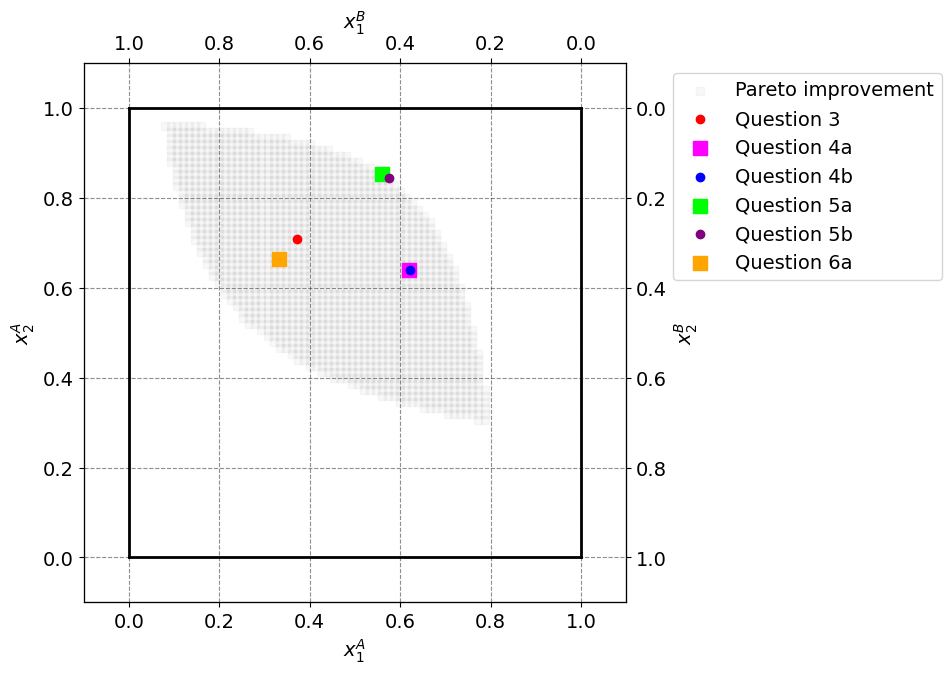

In [26]:
# 1. Defining consumer A's demand for goods 1 and 2 at market clearing for the previous questions
allocation_3 = demand_A_3
allocation_4a = (consumer_a_good_1, consumer_a_good_2)
allocation_4b = (consumer_a_good_1_4b, consumer_a_good_2_4b)
allocation_5a = pareto_combinations[index_max_util_A_5a]
allocation_5b = restricted_combinations[index_max_util_A_5b]
allocation_6a = highest_sum_utilities_6a

# 2. Plot the allocations in the Edgeworth plot
edgeworth_plot_6b = create_edgeworth_plot()

# 3. Adding datapoints to the Edgeworth box
edgeworth_plot_6b.scatter(x1A_pareto, x2A_pareto, marker='s', color='gray', label='Pareto improvement', alpha = 0.05)
edgeworth_plot_6b.scatter(allocation_3[0], allocation_3[1], marker='o', color='red', label='Question 3')
edgeworth_plot_6b.scatter(allocation_4a[0], allocation_4a[1], marker='s', color='Magenta', label='Question 4a', s = 100)
edgeworth_plot_6b.scatter(allocation_4b[0], allocation_4b[1], marker='o', color='blue', label='Question 4b')
edgeworth_plot_6b.scatter(allocation_5a[0], allocation_5a[1], marker='s', color='lime', label='Question 5a', s = 100)
edgeworth_plot_6b.scatter(allocation_5b[0], allocation_5b[1], marker='o', color='purple', label='Question 5b')
edgeworth_plot_6b.scatter(allocation_6a[0], allocation_6a[1], marker='s', color='orange', label='Question 6a', s = 100)
edgeworth_plot_6b.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

*The size of the points in the edgeworth plot above don't have any analytical meaning, they're just made bigger to see both datapoints where there is an overlap.*
<br>
<br>
<br>

**Social optimum (Question 6a + 3)**

In question 6a we've been told to find the social optimum, which maximizes utility for both consumers. In the social optimum there might be excess demand. In contrast, In question 3 we've been told to find the allocation that satisfies the market clearing condition and thus has no excess demand. By comparing the two allocations we see that the social optimum is not far off from what satisfies the market clearing condition.
<br>

**Difference between $p_1 \in \Rho_1$ and $p_1>0$ (Question 4a + 4b)**

The allocations from question 4a and 4b also overlap, where the major difference between the two allocation is that in 4a we're only able to pick prices in the set $\Rho_1$, but in 4b it's possible to pick any price that is $p_1>0$. Thereby we can conclude that almost the same price will be picked since everything else is equal in the maximization problem.
<br>

*Overall question 4:* In Q4 consumer B is a price-taker and consumer A is the price-setter. This leaves consumer B worse off than any other question (3,5 and 6), as it is not a condition that the equilibrium here is Pareto-efficient.


**Solution on the contract curve (Question 5a + 5b)**

The allocation in question 5a and question 5b are almost the same since the restrictions in the set C gives the same result as when the optimization problem is restricted by the condition $ u^B(1 - x_1^A, 1 - x_2^A) \geq u^B(\omega_1^B,\omega_2^B) $. The only difference is that the solution in question 5b might be a bit more exact since the detail_level parameter is set to a higher detail level.


**Overall difference between question 3,4,5 and 6**

It can be seen that the social planner will pick an allocation in question 6a that is more favourable towards consumer B. In comparison, when the two consumers trade "freely", consumer A ends up better off than in the social planner's allocation choice. We also know that when consumer B is the price taker in Question 4 consumer A gets a better allocation compared to in question 3 and 5 (since he is the price-setter).

# Question 7

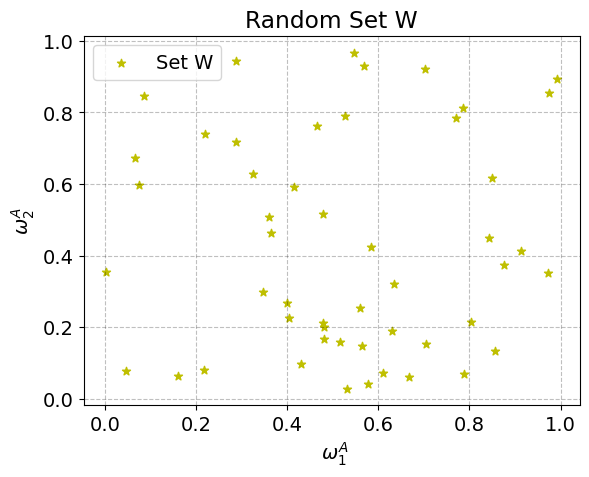

In [27]:
# 1. Set seed for reproducibility
np.random.seed(1997)

# 2. Generate 50 random elements for W
num_elements = 50
W = np.random.uniform(0,1,(2,50))

# 3. Seperating the list with touples so it can be plotted
w1A_endowment = W[0]
w2A_endowment = W[1]

# 4. Plot the set W
plt.scatter(w1A_endowment, w2A_endowment, label='Set W', marker='*', color='y')

# 5. Add labels and legend
plt.xlabel(' $ \omega_{1}^{A} $')
plt.ylabel('$ \omega_{2}^{A} $')
plt.title('Random Set W')
plt.legend()

# 6. Show the plot
plt.show()

# Question 8

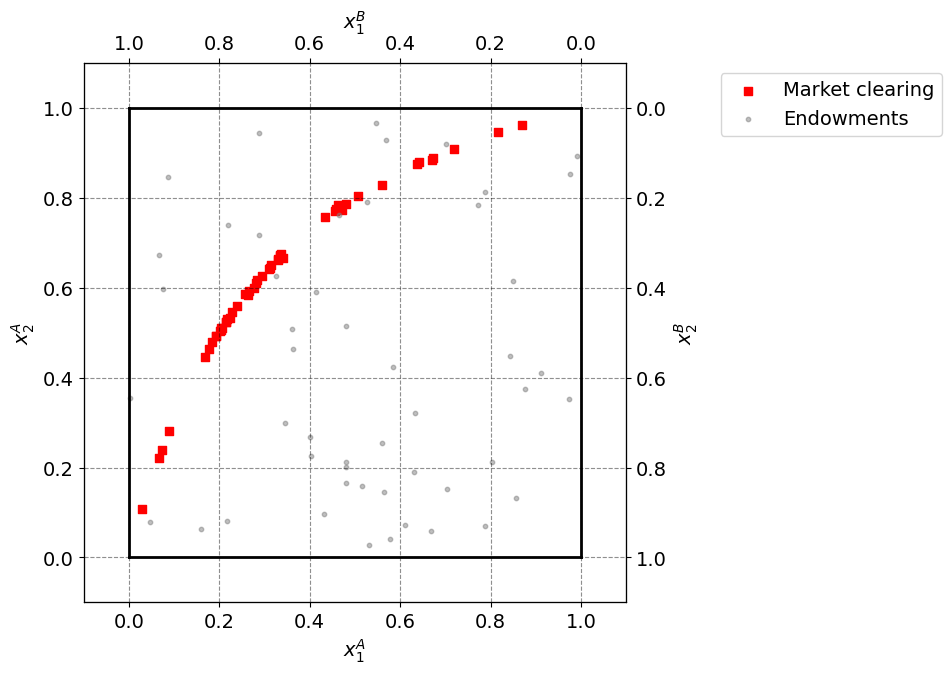

In [28]:
# 1. Initialize the model economy
model = ExchangeEconomyClass()

# 2. Create array to store market clearing allocations of x1A and x2A
market_clearing_combinations = []

# 3. Create tuple list with endowment allocations
endowments_tuple_list = [(w1A, w2A) for w1A, w2A in zip(w1A_endowment, w2A_endowment)]

# 4. Loop through endowments and find the market clearing combination for each endowment
for endowment in endowments_tuple_list:

    # 4.1 Setting the endowments in the model
    model.par.w1A = endowment[0]
    model.par.w2A = endowment[1]

    model.par.w1B = 1 - endowment[0]
    model.par.w2B = 1 - endowment[1]

    # 4.2 Calling the custom implemented find_market_clearing function
    (price, x1A, x2A) = model.find_market_clearing()

    # 4.3 Add the market clearing combination to the market_clearing_combinations array
    market_clearing_combinations += [(x1A, x2A)]


# 5. Setup the edgeworth plot
# 5.1. Initializing plot
edgeworth_plot_8 = create_edgeworth_plot()

# 5.2. Seperating the market clearing combinations into two lists for them to be plotted
x1A_8 = [x[0] for x in market_clearing_combinations]
x2A_8 = [x[1] for x in market_clearing_combinations]

# 5.3. Adding datapoints to the Edgeworth box
edgeworth_plot_8.scatter(x1A_8, x2A_8, marker='s', color='red', label='Market clearing')
edgeworth_plot_8.scatter(w1A_endowment, w2A_endowment, marker='o', color='gray', label='Endowments', s = 10, alpha = 0.5)
edgeworth_plot_8.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

The plot above is an edgeworth plot with the market clearing combinations for consumer A and B, which have been found from randomly generated endowments. The gray points illustrate the endowments that have been randomly generated for both consumer A and B for goods 1 and 2 respectively. The red curve is the pareto optimal combinations for each endowment combination. This is also commonly called the contract curve in microeconomics. Thereby we have found the market equilibrium allocation for each endowment.